# Desgin of the Project


## Encryption

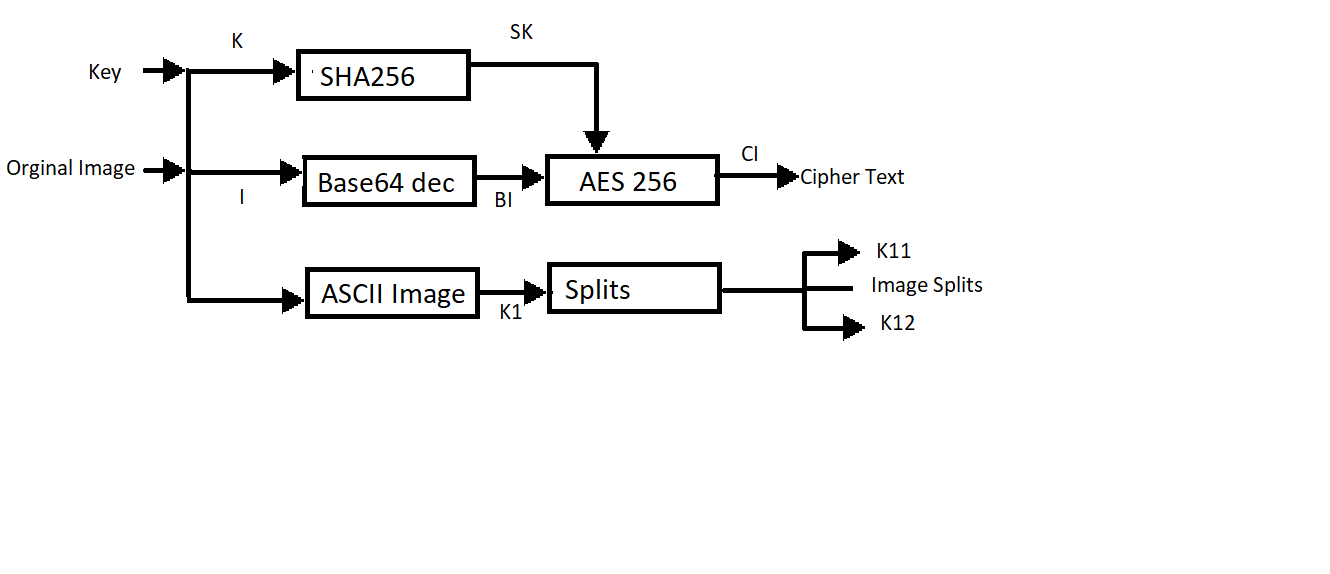

## Decryption

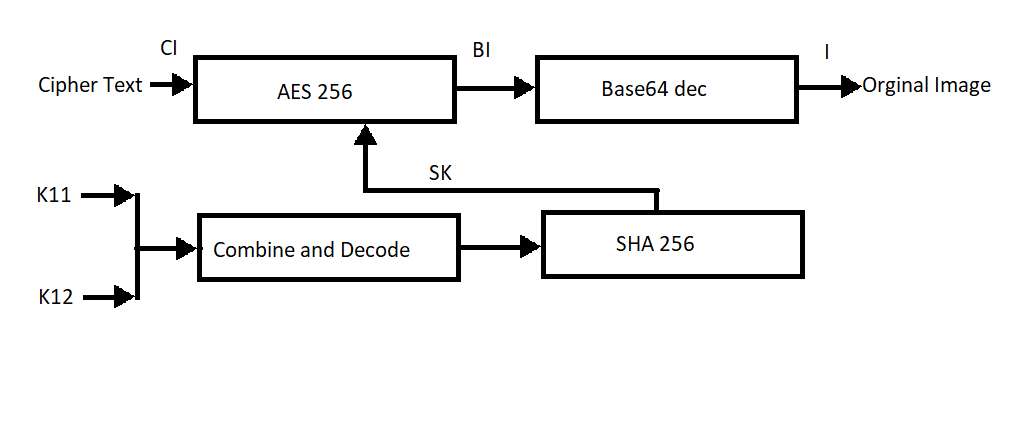

# Prerequisites
## Libraries 

In [1]:
import base64
import hashlib 
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from Crypto.Cipher import AES
from Crypto.Random import new as Random
from hashlib import sha256
from base64 import b64encode,b64decode
import os
from tkinter import *
from tkinter.filedialog import askopenfilename 
from tkinter import filedialog
from PIL import ImageTk, Image
import PIL
from tkinter import ttk, filedialog


from sklearn.linear_model import LinearRegression



root = Tk()
root.geometry("500x200")
def process_pending():
    Label(root, text= "1)Image to base64").place(x=200,y=45)
    Label(root, text= "2)Encrypt base64 AES with key").place(x=200,y=65)
    Label(root, text= "3)Encrypt Key to K1 and K2 Visual Cryptography").place(x=200,y=85)

Label(root, text="Encryption Steps", font=('Helvetica 14 bold')).pack(pady=20) 
ttk.Button(root,text="Show",command=process_pending).pack()
root.mainloop()

## Image Choosing and Function Related to it

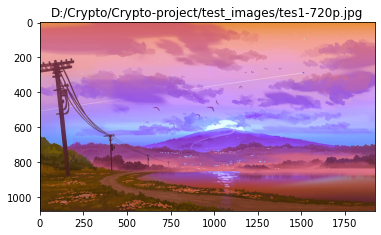

D:/Crypto/Crypto-project/test_images/tes1-720p.jpg
D:\Crypto\Crypto-project


In [2]:

'''We are using Tkinter to get the image and it's location using GUI '''
master = Tk()
master.geometry("800x200")
entry_label= Label(master, text="Choose the Location of the Image")
entry = Entry( master , font = 35, width = 60)
entry.grid( row = 2 , column = 2 )
file_loc="empty"

def show(filename):
    img = cv2.imread(filename)
    gray = img
    plt.imshow(gray)
    plt.title(filename)
    plt.show()
    global image_path
    image_path=filename

def getfilename():
    '''This Fucntion get's in the file and it's location and once it gets it , it gets closed '''
    
    filename=askopenfilename(filetypes= (("jpg file", "*.jpg"), ("png file","*.png"),("All files", "*.*")))
    if entry.index("end") == 0:
        entry.insert(END,filename)
        b1=Button(master,text="Choose",font=35,command= getfilename)
        b1.grid(row=2,column=4)
        file_loc=str(filename)
        show(filename)
    else:
        master.destroy()        
    print(filename)
getfilename()

master.mainloop()
# print(filename)
print(os.getcwd())

D:/Crypto/Crypto-project/test_images/tes1-720p.jpg


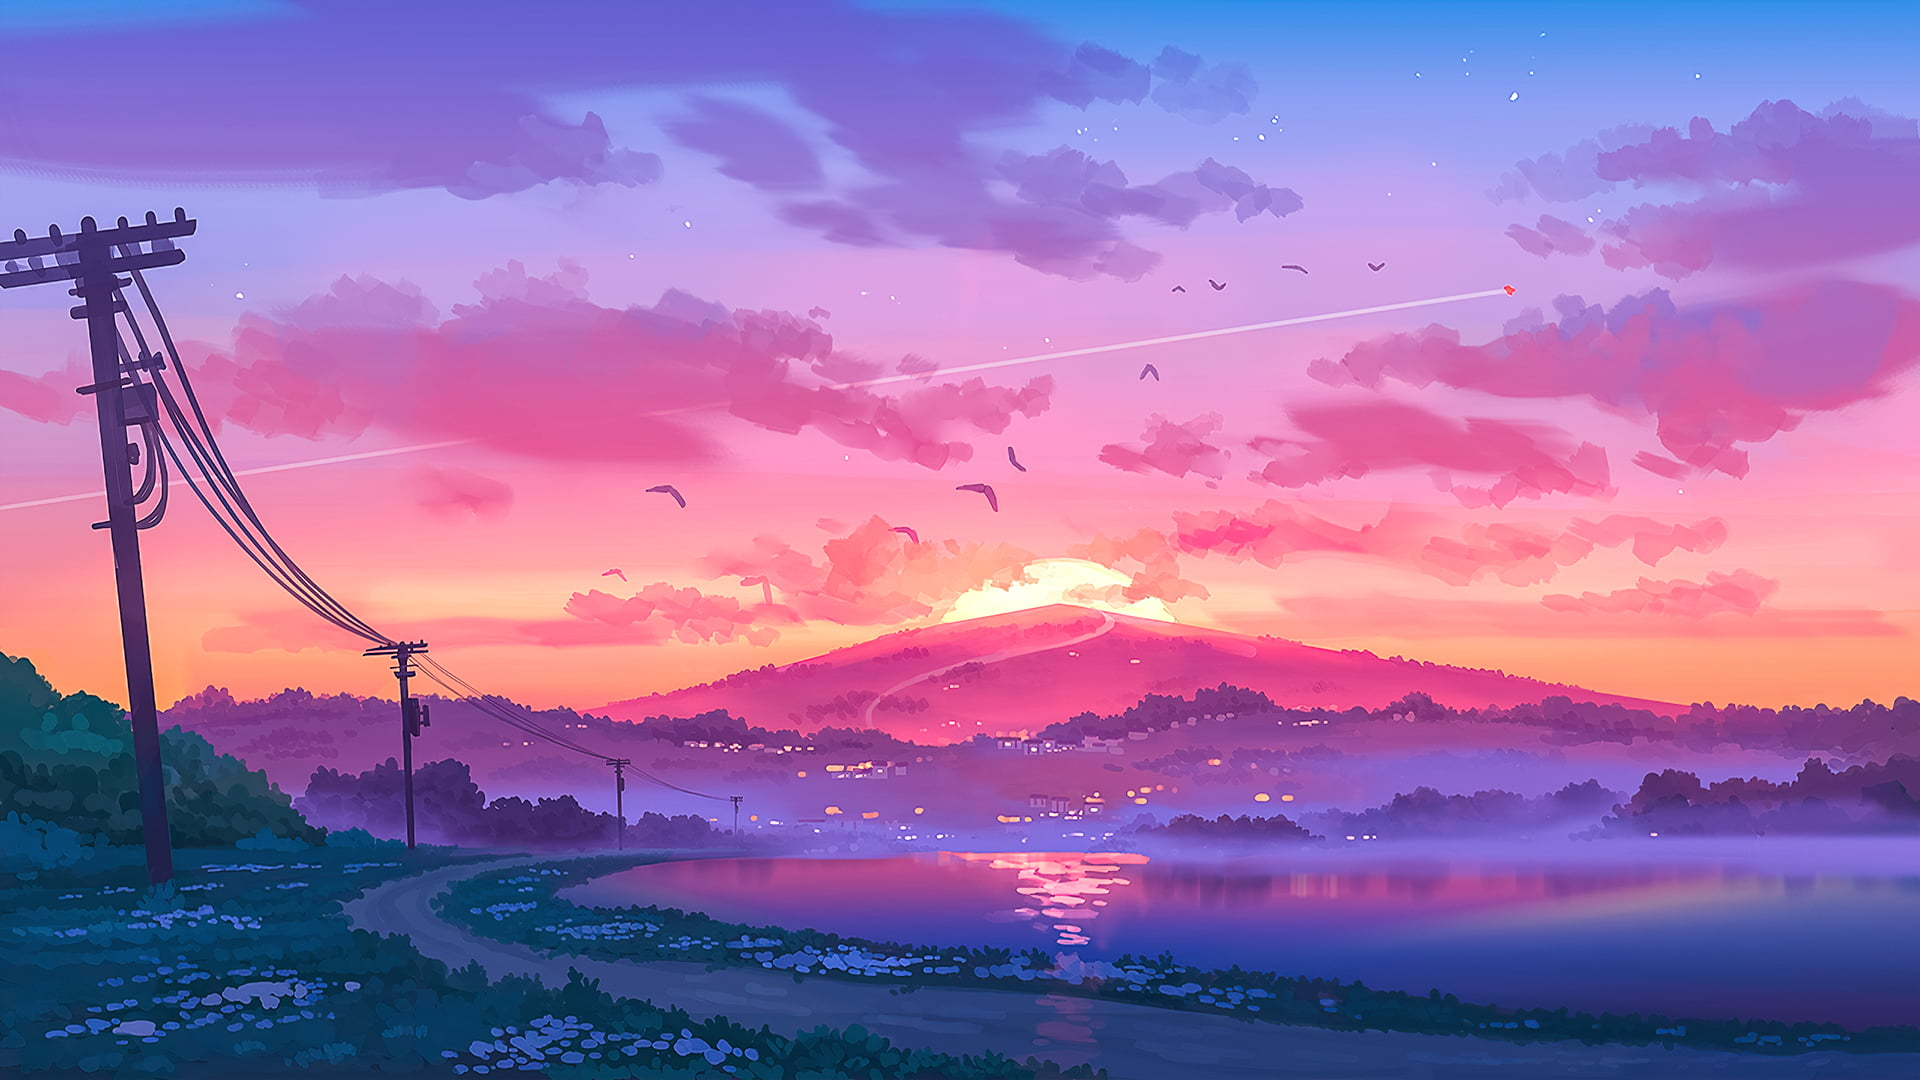

In [3]:
print(image_path)
import base64
from IPython.display import Image
Image(filename=image_path)


## Image to base64 conversion

In [5]:
# We Read the Image and Convert it into b64
def open_imageb64(image_path):
    with open(image_path, "rb") as img_file:
        BI = base64.b64encode(img_file.read())
#     print(BI)
    BI = BI.decode("utf-8")
    #We are decoding it in utf-8
    return BI


## AES Encryption and Decryption module in Output Feedback Mode

In [6]:

'''
I am have Choosen OFB Mode is because , I will have to choose a Mode of Encryption and 
read that OFB is the Most Secure way of Encrypting way in AES
'''
class AESCipher_OFB:
    def __init__(self,data,key):
        self.block_size = 16
        self.data = data
        self.key = sha256(key.encode()).digest()[:32]
        self.pad = lambda s: s + (self.block_size - len(s) % self.block_size) * chr (self.block_size - len(s) % self.block_size)
        self.unpad = lambda s: s[:-ord(s[len(s) - 1:])]

    def encrypt(self):
        plain_text = self.pad(self.data)
        iv = Random().read(AES.block_size)
        print(iv)
        cipher = AES.new(self.key,AES.MODE_OFB,iv)
#         print((cipher_text))
        return b64encode(iv + cipher.encrypt(plain_text.encode())).decode()   
    
    
    def decrypt(self):
        cipher_text = b64decode(self.data.encode())
#         print(cipher_text)
        iv = cipher_text[:self.block_size]
        cipher = AES.new(self.key,AES.MODE_OFB,iv)
        return self.unpad(cipher.decrypt(cipher_text[self.block_size:])).decode()

## The Symmetric Key to Encrypt the Image 

In [7]:
# We get the key and sha 256 the function the output 
def create_directory():
    directory = "Key"
    parent_dir=os.getcwd()
    path = os.path.join(parent_dir, directory)
    print(path)
    if ( not os.path.isfile(path)) :
        os.mkdir(path)
        
        
def get_key():
    root = Tk()
    keylist = []
    root.wm_title("Enterkey")
    entry_label= Label(root, text="Enter The Key")
    def key_data_entry(l):
        l.append(box1.get())
        lenoflist = len(l)
        K=l[lenoflist-1]
        f= open('Key/SymKey.txt','w')
        f.write(K)
        f.close()
        print(l)

    var1 = StringVar()
    var1.set("Key For Encryption ")
    label1 = Label(root,textvariable=var1,height = 4)
    label1.grid(row=0,column=0)
    Key=StringVar()
    box1=Entry(root,bd=4,textvariable=Key)
    box1.grid(row=0,column=1)
    buttonSave= Button(root, text = "Save the Key",command=lambda: key_data_entry(keylist), width=5)
    buttonSave.grid(row=0,column=2)
    root.mainloop()
    
def key_sha_conversion():
    K=''
    f = open('Key/SymKey.txt','r')
    for i in f:
        K += i
    f.close()
    print('The Key is ..')
    print(K)
    SK= hashlib.sha256(K.encode())
    print(SK)
    print("The hexadecimal equivalent of SHA256 is : ") 
    print(SK.hexdigest())
    return K


## Visual Cryptography

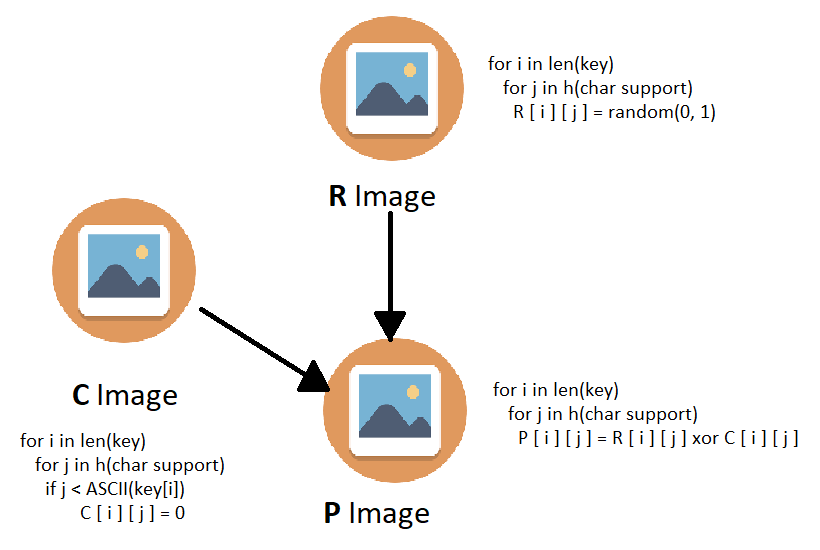

In [8]:
def visual_encrryption(key,character_sup):
    '''
    Initially we Create the C , the C is not really an Image , it is a 
    Single layer of matrix of w x h x 1,as I have considered only to be a '''
    print(key)
    h=len(key)
    
    w= character_sup
    C = np.ones((h,w,1),dtype='uint8')
    '''
    Why We are using the h x w x 3 here is because the Image is a RGB Combination
    so for that we requie the RGB Color Coding 
    '''
    R = np.ones((h,w,3), dtype = 'uint8')
    P = np.ones((h,w,3), dtype = 'uint8')
    # Creating C
    for i in range(h):
        j = ord(key[i])
        for k in range(w):
            if k < j:
                C[i][k][0] = 0
            else:
                break
    
    #Creating R and P
    #Key 1
    for i in range(h):
        for j in range(w):         
            R[i][j][0] = np.random.normal(0,1,1)
    #Key 2
    print()
    for i in range(h):
        for j in range(w):
            P[i][j][0] = R[i][j][0] ^ C[i][j][0]
    return R,P           

## Save Image in B64 format

In [9]:
def trans_save_image(text):
    f = open("media/cipher.txt",'a',encoding='utf-8')
    f.write(text)
    f.close()
print(os.getcwd())

D:\Crypto\Crypto-project


# Encryption

In [10]:
Imageb64= open_imageb64(image_path)
print(os.getcwd())

create_directory()
get_key()
print(os.getcwd())

SKey = key_sha_conversion()
SK = hashlib.sha256(SKey.encode())
# print(os.getcwd())
CipherTxt= AESCipher_OFB(Imageb64,SK.hexdigest()).encrypt()
txt = []
for each in CipherTxt:
    ch = ord(each)
    txt.append(int(ch))
text = ""
for t in txt:
    text += chr(t) + " "
len(text)
trans_save_image(text)

#tkinter function of the Image Size Analysis 
root=Tk()
root.geometry("700x200")
def sizee():
    size=len(text)/2
    Label(root,text=f"The size of {image_path}is {int(size)}").place(x=50,y=40)
ttk.Button(root,text=f"{image_path}",command=sizee).pack()
root.mainloop()

# print(CipherTxt)
print(SKey)
R,P=visual_encrryption(SKey,255)
''' We are taking characters supported as 255'''
folder='Imagekeys/'
key1=folder+'K1.png'
key2=folder+'K2.png'
cv2.imwrite(key1,R)
cv2.imwrite(key2,P)
'''
Now let's save the Image in base64 format to share the thing 
print(os.getcwd())
'''






D:\Crypto\Crypto-project
D:\Crypto\Crypto-project\Key
['Cryptography']
D:\Crypto\Crypto-project
The Key is ..
Cryptography
<sha256 HASH object @ 0x000002388EEE0950>
The hexadecimal equivalent of SHA256 is : 
b584eec728548aced5a66c0267dd520a00871b5e7b735b2d8202f86719f61857
b'9\xd8\xfc\x1f^k\xef\x90\xe7\xb4<\xa5/\xc0ZK'
Cryptography
Cryptography



"\nNow let's save the Image in base64 format to share the thing \nprint(os.getcwd())\n"

In [11]:
print(len(text))
print(text)

2937944
O d j 8 H 1 5 r 7 5 D n t D y l L 8 B a S 4 b F j H l 7 i D q d g R 3 R 8 l H a a A 8 8 T R v i I m f d c f 4 n N a 9 Y q U L Y o 7 1 f 7 4 Y b X m R j 9 D q u W r C k I o x M N H U P r D x V 1 3 m J Y + K Q s p v X t j K C 6 Z 4 B p x 3 3 e O A Z w U K i 5 F g h o Z b 3 L I Q w S 5 s Y d f / G K V 7 9 r B i k z c F L b D M g Z u n / i / 1 e T L 4 9 j + 2 q 5 6 A 7 A m D K f Q A l 4 k U 4 p t z G R o Z k h / p j f b S s t K 1 M 9 A d j a n A 5 5 x o 8 S a T o G I b u 9 5 / y 5 G F p 9 l G h h h Y Z g C P W w K 8 v Y W I d M r s R a Y A 1 / A w m C s M 2 H g J u 0 w U D 3 F K e 1 y 6 q q B a 8 v 9 1 P S f M z p x w Y X S t R I G d D m 0 D r 0 J + L e S 7 n 1 H o m / H L 4 G m C z V / 5 G p Q j f j u Y V i w L 5 A W J y O H R J e 1 u q F W 0 Q t x D C N R G n q V Z z s r 5 p 3 e u / R Y V F p h c g O x L x X y 4 A j B z E e q t v I U B g R s 7 W Y B + + c g z r t S c O K b U N M a a D L z c s h 4 G x N H f 6 J x 3 r K B + G v + B O E 1 Z m n m S b 7 V j + 5 x R n n G 4 H r v M o 

# Image Analysis

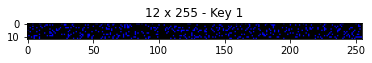

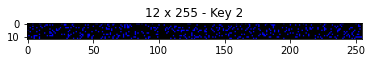

Key is ..
Cryptography


In [13]:
plt.subplot(3,1,1)
Image1=PIL.Image.open(key1).convert('RGB')
plt.imshow(Image1)
plt.title(str(len(SKey))+' x 255 - Key 1')
plt.show()

plt.subplot(3,1,2)
Image2=PIL.Image.open(key2).convert('RGB')
plt.imshow(Image2)
plt.title(str(len(SKey))+' x 255 - Key 2')
plt.show()

print('Key is ..')
print(SKey) #This is a hexadecimal Key

# Decryption

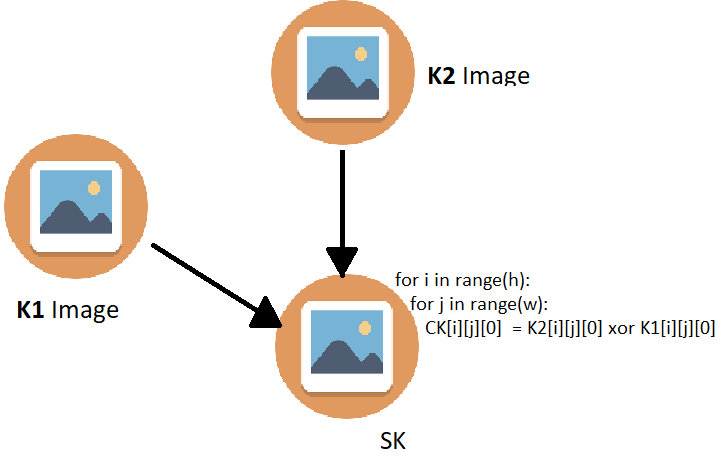

In [14]:
root = Tk()
root.geometry("500x200")
def process_pending():
    Label(root, text= "1)Retrive Key from the K1 and K2 Images").place(x=200,y=45)
    Label(root, text= "2)Decrypt the Cipher Image").place(x=200,y=65)
    Label(root, text= "3)base64 to Image").place(x=200,y=85)

Label(root, text="Decryption Steps", font=('Helvetica 14 bold')).pack(pady=20) 
ttk.Button(root,text="Show",command=process_pending).pack()
root.mainloop()

In [15]:
def ViusalEcryptedkey():
    root = Tk()
    root.geometry("800x200")
    entry_label= Label(root, text="Choose the Location of the Keys")
    entry = Entry( root , font = 35, width = 60)
    entry.grid( row = 2 , column = 2 )
    def key_loc():
        folder_selected = filedialog.askdirectory()
        if entry.index("end") == 0:
            entry.insert(END,folder_selected)
            b1=Button(root,text="Choose",font=35,command= key_loc)
            b1.grid(row=2,column=4)
            print(folder_selected)
            global folder
            folder = folder_selected
        else:
            root.destroy()
        print(folder)
    key_loc()
    root.mainloop()
    
    
def Decrypt(K1,K2):
    h= np.shape(K1)[0]
    w= np.shape(K2)[1]
    CK= np.ones((h,w,1),dtype='uint8')
    for i in range(h):
        for j in range(w):
            CK[i][j][0]=P[i][j][0] ^ R[i][j][0]
#     print(CK)
    K=[]
    for i in range(len(CK)):
        K.append(0)
        count=0
        for j in range(len(CK[i])):
            if CK[i][j][0] == 0:
                count+=1
        K[i]= chr(count)
    K="".join(K)
    K
    return K

def get_image():
    root = Tk()
    root.geometry("800x200")
    entry_label= Label(root, text="Choose the Location of the Keys")
    entry = Entry( root , font = 35, width = 60)
    entry.grid( row = 2 , column = 2 )
    def image_loc():
        file = askopenfilename(filetypes= (("Encrypted Image file", "*.txt"),("All files", "*.*")))
        if entry.index("end") == 0:
            entry.insert(END,file)
            b1=Button(root,text="Choose",font=35,command= image_loc)
            b1.grid(row=2,column=4)
#             print(file)
            global file_loc
            file_loc = file
        else:
            root.destroy()
        print(file_loc)
    image_loc()
    root.mainloop()
    return file_loc
def decrypt_image(file):
    f = open(file,'r',encoding='utf-8')
    cipher=f.read()
    f.close()
    cipher = cipher.split(' ')
    txt = []
    for each in cipher:
        try:
            ch = ord(each) 
            txt.append(int(ch))
    #         print(chr(ch))
        except:
            print(each)

    imgbase64=""
    for t in txt:
        imgbase64+=chr(t)+" "
    print(len(imgbase64))
    return imgbase64

In [16]:
ViusalEcryptedkey()
os.chdir(folder)
R=cv2.imread('K1.png')
P=cv2.imread('K2.png')
K=Decrypt(R,P)
print(K)
SK = hashlib.sha256(K.encode())
print(SK.hexdigest())
file=get_image()
print(file)

D:/Crypto/Crypto-project/Imagekeys
D:/Crypto/Crypto-project/Imagekeys
Cryptography
b584eec728548aced5a66c0267dd520a00871b5e7b735b2d8202f86719f61857
D:/Crypto/Crypto-project/media/cipher.txt
D:/Crypto/Crypto-project/media/cipher.txt


In [17]:
imgbase64=decrypt_image(file)
de = AESCipher_OFB(imgbase64,SK.hexdigest()).decrypt()
de = de.encode("utf-8")
print(len(de))


2937944
1101704


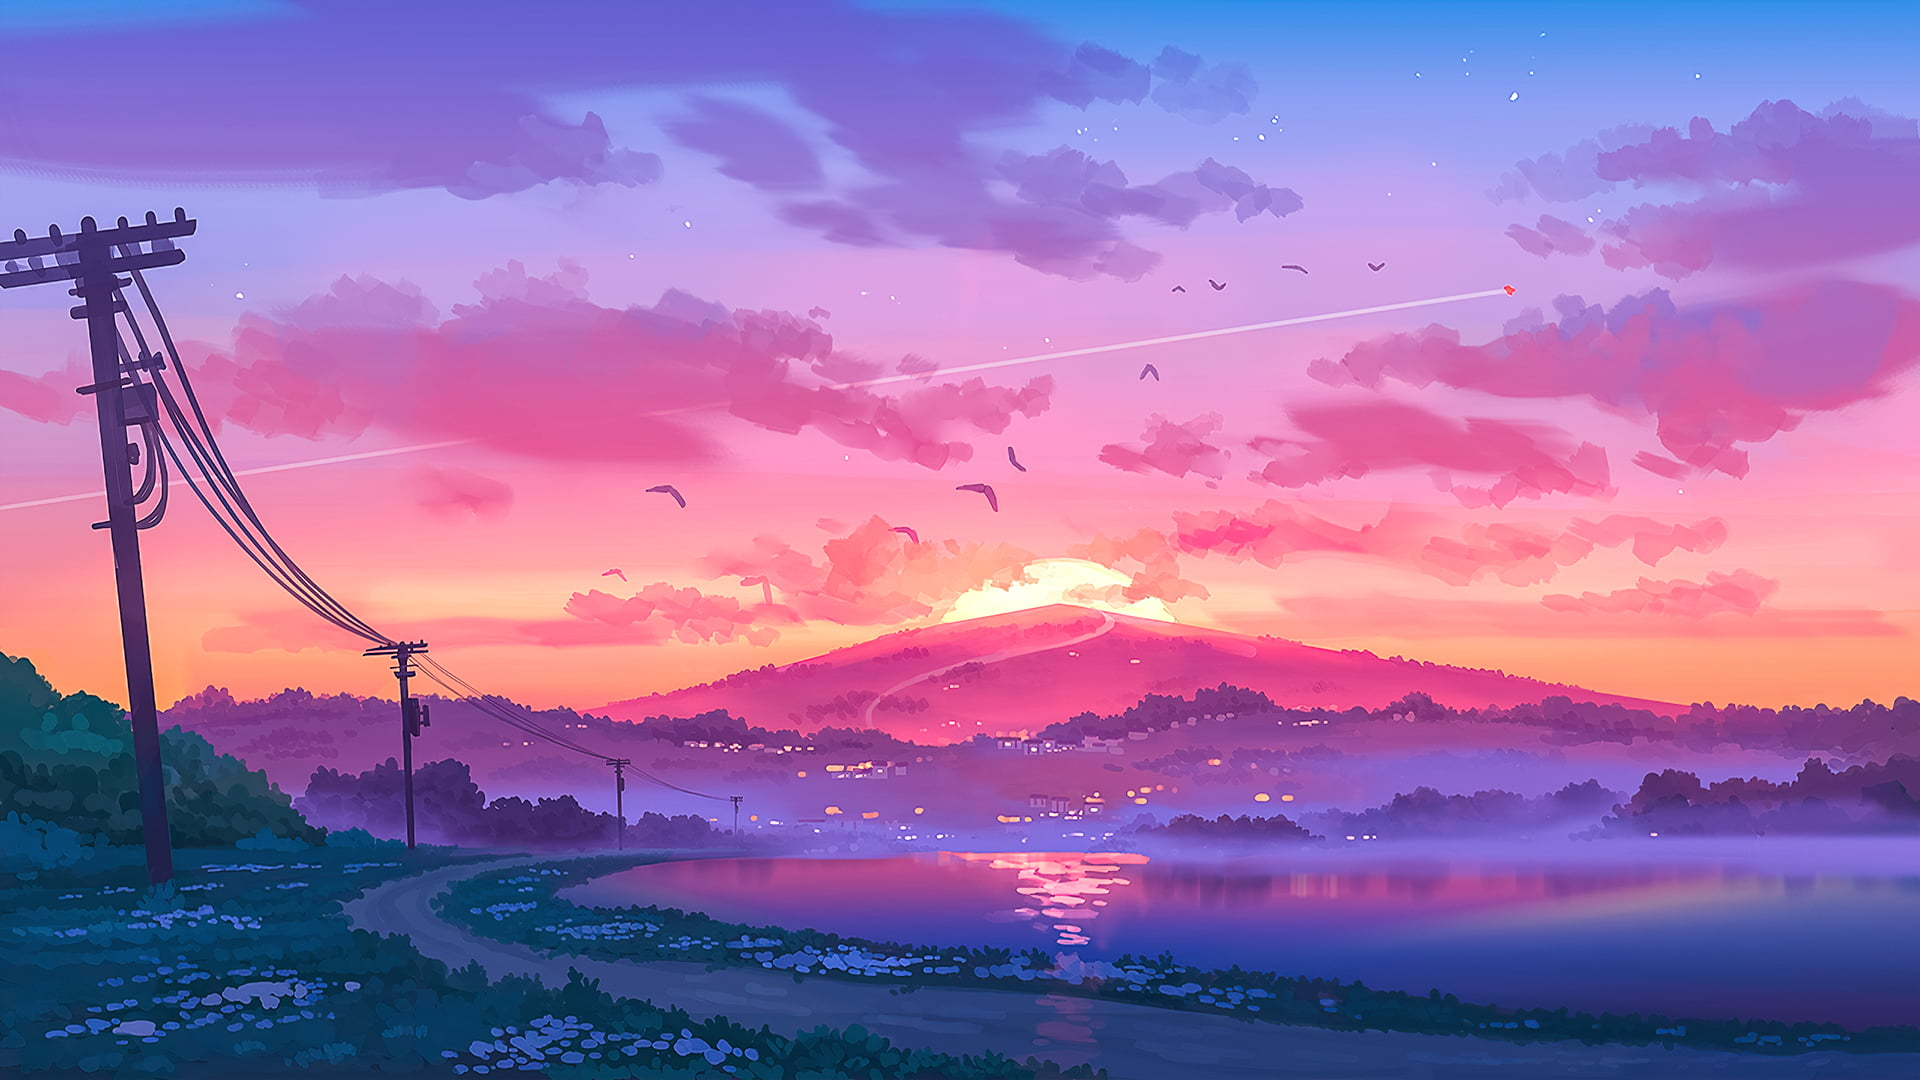

In [18]:
with open("DecryptedImg1.png", "wb") as fh:
    fh.write(base64.decodebytes(de))
import base64
from IPython.display import Image
Image(filename="DecryptedImg1.png") 

In [19]:
import os
if os.path.isfile(file):
    os.remove(file)